# SO(3)/$\mathbb{S_3}$ valued data, on grid-graph, i.e. SO(3)/$\mathbb{S_3}$-image

### arXiv: [Denoising of Sphere- and SO(3)-Valued Data by Relaxed Tikhonov Regularization](https://arxiv.org/abs/2307.10980)

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.interpolate import RegularGridInterpolator
import scipy as sc
import scipy.stats
import time
from scipy import interpolate
import matplotlib.gridspec
from scipy.interpolate import CubicSpline
from scipy.stats import vonmises
from scipy.stats import vonmises_fisher
import imp
import relaxed_tikhonov_sphere_image

import condat_tv

iter = 300
rho = 1
tau = 0.1

In [19]:
imp.reload(relaxed_tikhonov_sphere_image)

<module 'relaxed_tikhonov_sphere_image' from '/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere_image.py'>

### Generating signals 

- Data : thruth signal 
- Noise : noised signal by Von-Mises-Fisher

In [5]:
#Noise, Data = smap_vMF_image(10,3.5)

Noise, Data = relaxed_tikhonov_sphere_image.sample_SO3_image(10)

In [6]:
[a0, p0, t0] = relaxed_tikhonov_sphere_image.angle_SO3(Data)
[a, p, t] = relaxed_tikhonov_sphere_image.angle_SO3(Noise)

In [7]:
Noise_trans, backtranset21, backtranset22 = relaxed_tikhonov_sphere_image.transformation_SO3(Noise)
Data_trans, backtranset021, backtranset022 = relaxed_tikhonov_sphere_image.transformation_SO3(Data)

[aa0, pp0, tt0] = relaxed_tikhonov_sphere_image.angle_SO3(Data_trans)
[aa, pp, tt] = relaxed_tikhonov_sphere_image.angle_SO3(Noise_trans)

### Main algorithm

- ADMM_red : solving the proposed simplified and generalized convex optimization problem in ...
- PMM : solving the complex-valued S_1-model proposed by Condat ...
- BASELINE : solving the state-of-the-art ball-relaxed problem 
- ADMM_TV_BOX . solving the rely TV problem 

In [13]:
q, qn, qdata, qres1, qres2, qtime = relaxed_tikhonov_sphere_image.ADMM_red(Noise_trans, Data_trans, 1*iter+1, 1, 3*rho, 5)

iteration 	| func-value 	| non-convex-cost 	| spherical-error
--------------------------------------------------------------------------
0 		|   2.111e+04 	|   1.982e+03 		|  9.577e-01
100 		|   6.300e+02 	|   3.800e+02 		| -4.546e-06
200 		|   6.297e+02 	|   3.808e+02 		| -3.934e-08
300 		|   6.297e+02 	|   3.808e+02 		| -2.012e-09
finale 		|  6.297e+02 				|  sphered
298 629.7040881129849 156.77422308921814


In [14]:
print('MAE(Solution) = ', "%10.3e"%(np.sum(np.abs(q-Data))/np.size(q[0,:,:])), '\t| MAE(Noise) = ', "%10.3e"%(np.sum(np.abs(Noise-Data))/np.size(q[0,:,:])))
print('cMSE(Solution) = ', "%10.3e"%(np.sum(np.arccos(np.sum((q*Data),0))**2)/np.size(q[0,:,:])), '\t| cMSE(Noise) = ', "%10.3e"%(np.sum(np.arccos(np.sum((Noise*Data),0))**2)/np.size(q[0,:,:])))

MAE(Solution) =   2.593e-01 	| MAE(Noise) =   3.839e-01
cMSE(Solution) =   7.869e-02 	| cMSE(Noise) =   1.840e-01


In [15]:
qW2, qX2, qY2, qZ2, datapmm = relaxed_tikhonov_sphere_image.PMM_S2S3_2D(Noise_trans, Data_trans, 1, iter+1, tau, rho, 0, 5)

iteration 	| func-value 	| original-cost 	| spherical-error
---------------------------------------------------------------------------


0 		|   2.317e+04 	|   2.321e+04 		|   9.000e-01
100 		|   6.247e+02 	|   5.197e+02 		|  -1.273e-04
200 		|   6.297e+02 	|   5.262e+02 		|   3.050e-07
300 		|   6.297e+02 	|   5.262e+02 		|  -4.582e-10
296 629.7039367847129 146.59412288665771


In [8]:
q, qz = relaxed_tikhonov_sphere_image.ADMM_TV_BOX(Noise_trans, Data_trans, 0.1, 100, 10000)

iter. 	| funv-value 	| RMSE 		| error 	| spherical-error
----------------------------------------------------------------------------------
0  	|   7.953e+03  	|   9.817e-01  	|   8.545e-01  	|   8.915e+01
100  	|   6.447e+02  	|   6.476e-02  	|   8.440e-01  	|   6.003e+00
200  	|   6.735e+02  	|   7.819e-02  	|   9.318e-03  	|   4.108e-02
300  	|   6.738e+02  	|   7.826e-02  	|   2.128e-03  	|   1.507e-04


In [9]:
print('cMSE(Solution) = ', "%10.3e"%(np.sum(np.arccos(np.sum(np.abs(q*Data),0))**2)/np.size(q[0,:,:])), '\t| cMSE(Noise) = ', "%10.3e"%(np.sum(np.arccos(np.sum(q*Data,0))**2)/np.size(q[0,:,:])))

cMSE(Solution) =   1.537e-02 	| cMSE(Noise) =   1.371e-01


In [16]:
qq = relaxed_tikhonov_sphere_image.back_transformation_SO3(q, backtranset21, backtranset22)

In [22]:
p1, datappa = relaxed_tikhonov_sphere_image.baseline(Noise, Data, 1, 10*iter+1, 0)

24120.0
iteration 	| func-value 	| original-cost 	| solution is
-------------------------------------------------------------------
0 		|   2.304e+04 	|   2.309e+04 		| unsphered
50 		|   3.573e+03 	|   3.534e+03 		| unsphered
100 		|   3.501e+03 	|   3.461e+03 		| unsphered
150 		|   3.501e+03 	|   3.461e+03 		| unsphered
200 		|   3.501e+03 	|   3.461e+03 		| unsphered
250 		|   3.501e+03 	|   3.461e+03 		| unsphered
300 		|   3.501e+03 	|   3.461e+03 		| unsphered
350 		|   3.501e+03 	|   3.461e+03 		| unsphered
400 		|   3.501e+03 	|   3.461e+03 		| unsphered
450 		|   3.501e+03 	|   3.461e+03 		| unsphered
500 		|   3.501e+03 	|   3.461e+03 		| unsphered
550 		|   3.501e+03 	|   3.461e+03 		| unsphered
600 		|   3.501e+03 	|   3.461e+03 		| unsphered
650 		|   3.501e+03 	|   3.461e+03 		| unsphered
700 		|   3.501e+03 	|   3.461e+03 		| unsphered
750 		|   3.501e+03 	|   3.461e+03 		| unsphered
800 		|   3.501e+03 	|   3.461e+03 		| unsphered
850 		|   3.501e+03 	|   3.461e+03 		|

In [1]:
#relaxed_tikhonov_sphere_image.plotSO3_image(Noise, Data, qq)

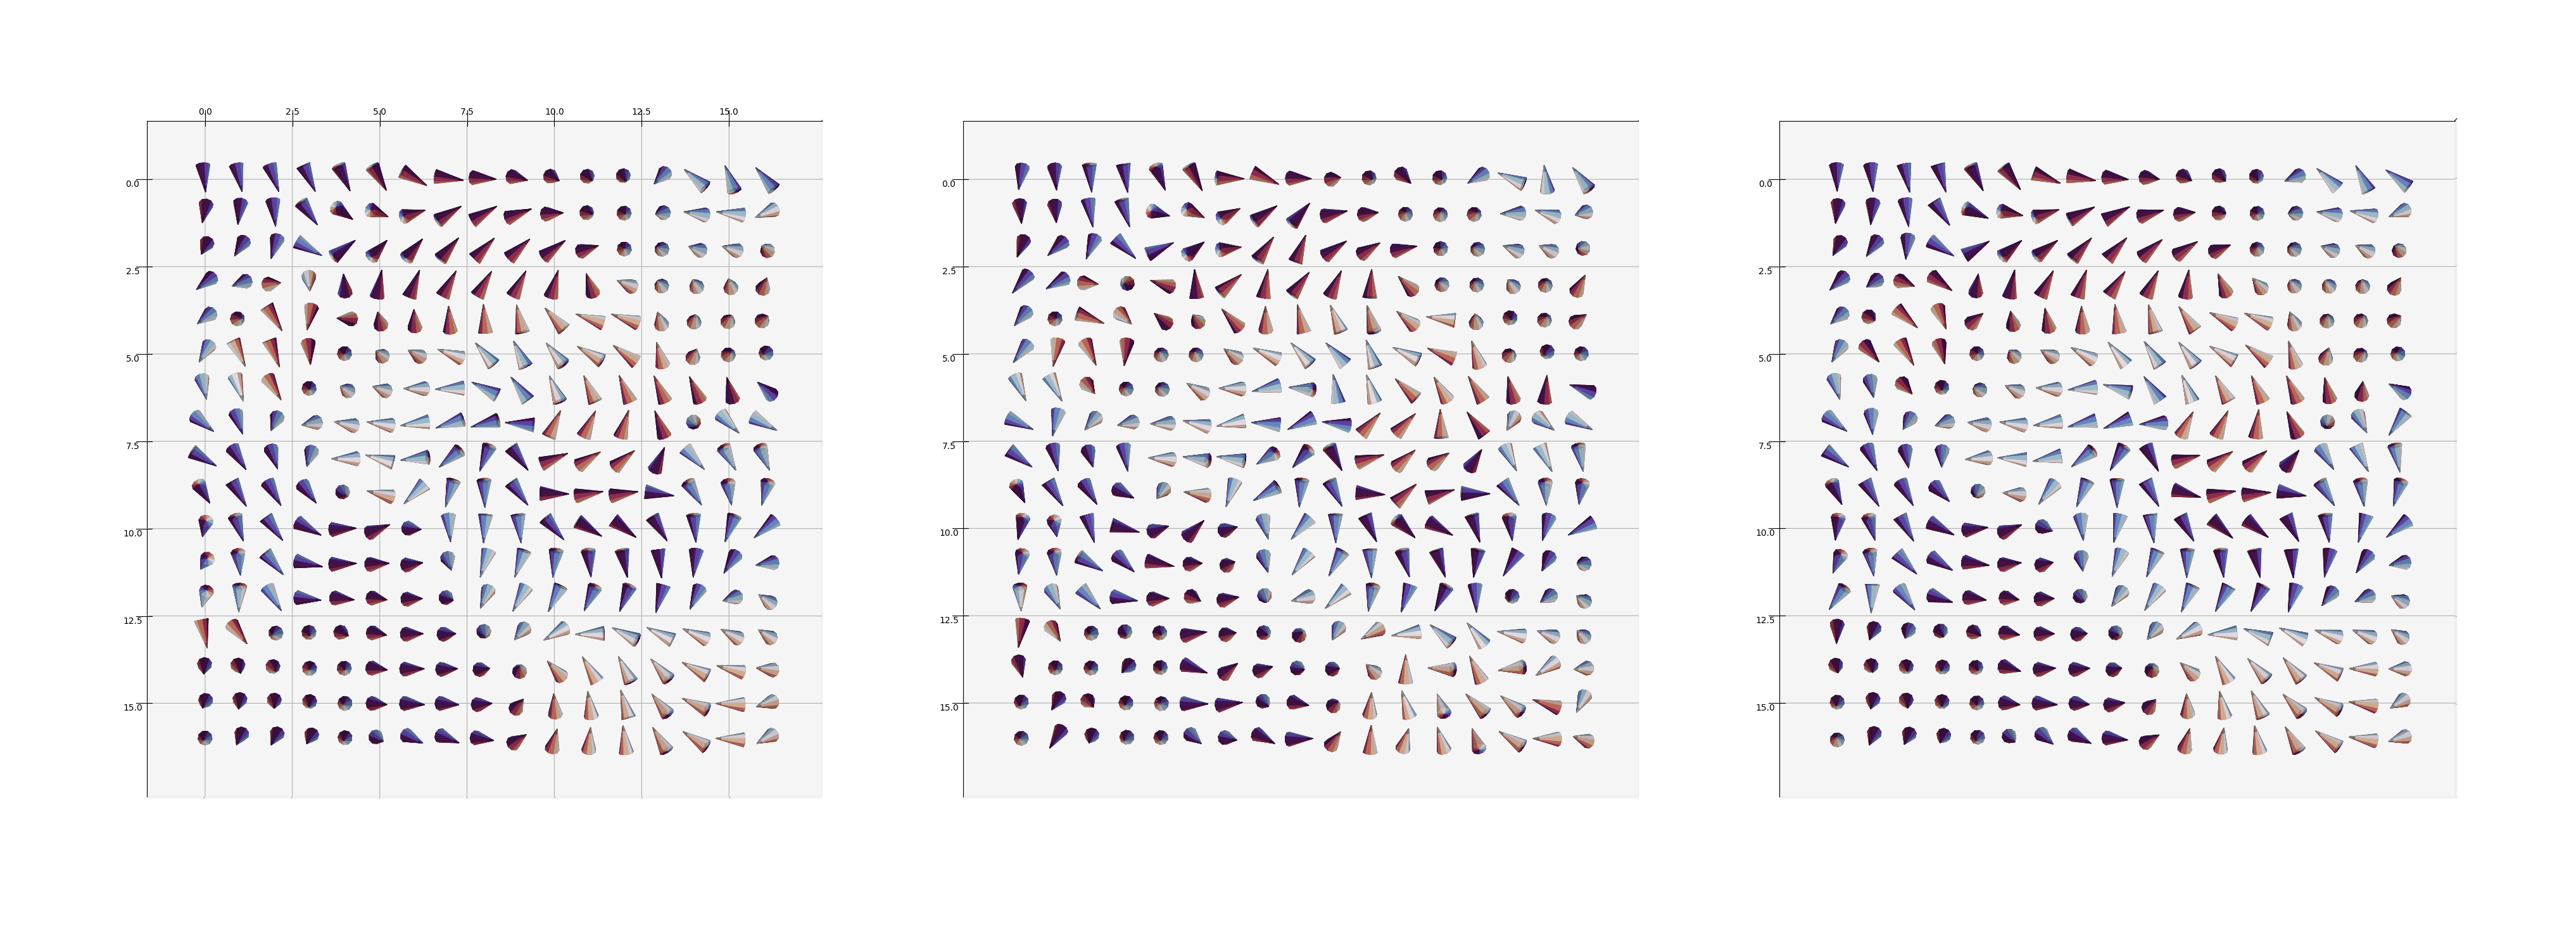

In [17]:
relaxed_tikhonov_sphere_image.plotSO3_image_cones(Noise, Data, qq)